### Importing Libraris

In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from mosaicml import *
from mosaicml.constants import MLModelFlavours
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Data Analysis and Preparation

In [9]:
data = pd.read_csv("Steel_industry_data.csv")
data.head()
data.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [11]:
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


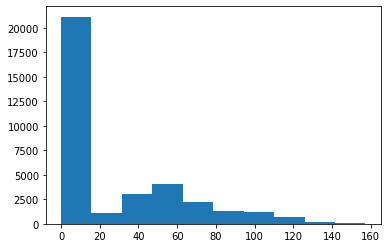

In [13]:
plt.hist(data["Usage_kWh"])
plt.show()

In [22]:
feature_columns = [column for column in data.columns if not column == "Usage_kWh" ]
input_data = data[feature_columns]
output_data = data["Usage_kWh"].values

In [23]:
list(input_data)

[3.17,
 4.0,
 3.24,
 3.31,
 3.82,
 3.28,
 3.6,
 3.6,
 3.28,
 3.78,
 3.46,
 3.24,
 3.96,
 3.31,
 3.31,
 3.89,
 3.28,
 3.56,
 3.74,
 3.31,
 3.56,
 3.56,
 3.28,
 3.78,
 3.35,
 3.24,
 3.89,
 3.31,
 3.28,
 3.85,
 3.2,
 3.31,
 3.78,
 3.28,
 3.49,
 3.89,
 3.6,
 4.03,
 3.92,
 3.64,
 4.07,
 3.71,
 3.6,
 4.21,
 3.49,
 3.46,
 4.0,
 3.49,
 3.6,
 4.25,
 3.67,
 3.67,
 4.25,
 3.64,
 3.67,
 4.28,
 3.64,
 3.78,
 4.1,
 3.64,
 3.92,
 4.1,
 3.6,
 3.96,
 4.0,
 3.6,
 4.07,
 3.82,
 3.56,
 4.1,
 3.6,
 3.6,
 4.0,
 3.42,
 3.67,
 4.07,
 3.53,
 3.85,
 3.96,
 3.56,
 4.03,
 3.74,
 3.56,
 4.21,
 3.56,
 3.53,
 4.25,
 3.53,
 3.56,
 3.67,
 3.24,
 3.53,
 3.53,
 3.24,
 3.67,
 3.42,
 3.2,
 3.85,
 3.28,
 3.35,
 3.89,
 3.28,
 3.46,
 3.78,
 3.31,
 3.6,
 3.64,
 3.28,
 3.71,
 3.56,
 3.24,
 3.89,
 3.28,
 3.28,
 3.96,
 3.24,
 3.46,
 3.67,
 3.24,
 3.67,
 3.53,
 3.2,
 3.78,
 3.35,
 3.53,
 6.3,
 6.05,
 6.73,
 29.02,
 46.19,
 52.06,
 56.2,
 56.84,
 51.26,
 48.13,
 52.81,
 54.79,
 53.21,
 80.21,
 77.58,
 128.52,
 144.47,
 90.86,
 123